Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [316]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

In [317]:
nSamples = 2**20
x = random.randn(nSamples)

Because samples are randomly distributed, we expect white noise
i.e. the PSD should be equal for all frequencies
Below, we compare various methods of estimating the PSD, evaluating their accuracy based on how similar their result is to a flat line

# Periodogram

In [318]:
def periodogram(x):
    # DTFT
    X = fft(x)
    X_periodogram = ((np.abs(X))**2)/nSamples

    return X_periodogram

# Bartlett's Method

In [319]:
def bartlett(x,bin_size=256):
    bins = int(nSamples/bin_size)-1

    X_B = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size]
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / bin_size
        X_B += Xs_periodogram
        
        m += bin_size

    X_B /= bins

    return X_B

# Welch's Method

In [320]:
def welch(x,bin_size=256,m_inc=128):
    bins = int(nSamples / m_inc)-1

    window_function = np.hamming(bin_size)
    U = np.sum(window_function**2)/bin_size # average energy of the window function

    X_W = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size] * window_function
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / (bin_size*U)
        X_W += Xs_periodogram
        
        m += m_inc # allow segment overlap!

    X_W /= bins

    return X_W

# Visualisation

Periodogram
Mean:       0.9976678011180122
Variance:   0.9936231468383616

Bartlett with Bin Size 16384
Mean:       0.9975796055708536
Variance:   0.015881045382581085

Welch with Bin Size 16384
Mean:       0.997289328056501
Variance:   0.008842746060911054

Var_B / Var_W = 1.7959404548302595

Bartlett with Bin Size 8192
Mean:       0.997833953145495
Variance:   0.00792062566437966

Welch with Bin Size 8192
Mean:       0.9976813626179961
Variance:   0.004420275238425517

Var_B / Var_W = 1.7918851739198378

Bartlett with Bin Size 4096
Mean:       0.997622601210102
Variance:   0.004013201184526305

Welch with Bin Size 4096
Mean:       0.9976338921628396
Variance:   0.0021712004702230626

Var_B / Var_W = 1.8483789219675328

Bartlett with Bin Size 2048
Mean:       0.9975042291721764
Variance:   0.0020461205428326064

Welch with Bin Size 2048
Mean:       0.9976039645156443
Variance:   0.0010406793981205175

Var_B / Var_W = 1.9661391841982558

Bartlett with Bin Size 1024
Mean:       0.997670

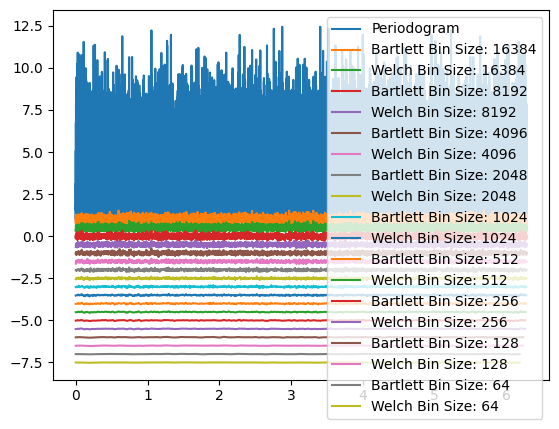

In [321]:
X = periodogram(x)
print(f"Periodogram")
print(f"Mean:       {np.mean(X)}")
print(f"Variance:   {np.var(X)}")
print()
w = 2*np.pi * np.arange(len(X))/len(X)
plt.plot(w,X+1,label="Periodogram")

bin_sizes = [64,128,256,512,1024,2048,4096,8192,16384][::-1]
for j,bin_size in enumerate(bin_sizes):
    X = bartlett(x,bin_size)
    w = 2*np.pi * np.arange(len(X))/len(X)
    plt.plot(w,X-j,label=f"Bartlett Bin Size: {bin_size}")
    print(f"Bartlett with Bin Size {bin_size}")
    print(f"Mean:       {np.mean(X)}")
    print(f"Variance:   {np.var(X)}")
    var_b = np.var(X)
    print()

    X = welch(x,bin_size,m_inc=int(bin_size/2))
    w = 2*np.pi * np.arange(len(X))/len(X)
    plt.plot(w,X-j-0.5,label=f"Welch Bin Size: {bin_size}")
    print(f"Welch with Bin Size {bin_size}")
    print(f"Mean:       {np.mean(X)}")
    print(f"Variance:   {np.var(X)}")
    var_w = np.var(X)
    print()

    print(f"Var_B / Var_W = {var_b/var_w}")
    print()

plt.legend()
plt.show()

# SciPy Welch's

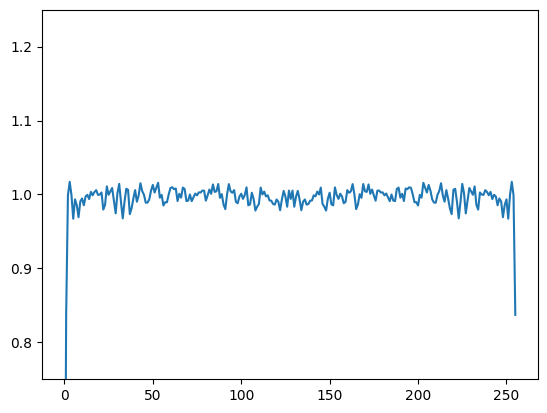

In [322]:
from scipy import signal as sps
bin_size = 256
f, P_xx = sps.welch(x,fs=1,nperseg=bin_size,noverlap=int(bin_size/2),return_onesided=False)
plt.ylim(0.75,1.25)
plt.plot(P_xx)
plt.show()